## Load the Dataset

In [252]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\umesh\Downloads\netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Initial inseption

In [256]:
print("\nDataset Shape:",df.shape)
print("\nColumns and Datatypes:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (8807, 12)

Columns and Datatypes:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Handle missing values

In [262]:
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('unknown',inplace=True)
df['rating'].fillna('unknown',inplace=True)
df['duration'].fillna('unknown',inplace=True)
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce' )

In [226]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## Feature Enginnering

In [265]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['genres']=df['listed_in'].str.split(', ')

In [267]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,[Documentaries]
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,11.0,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,7.0,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,11.0,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,1.0,"[Children & Family Movies, Comedies]"


# Exploratory Data Analysis

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

## Distribution of content types

In [370]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

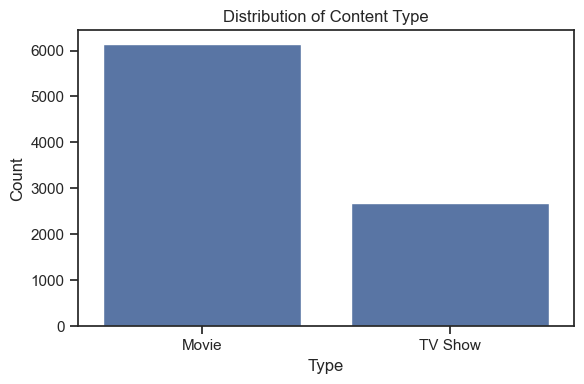

In [285]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Top 10 countries by content

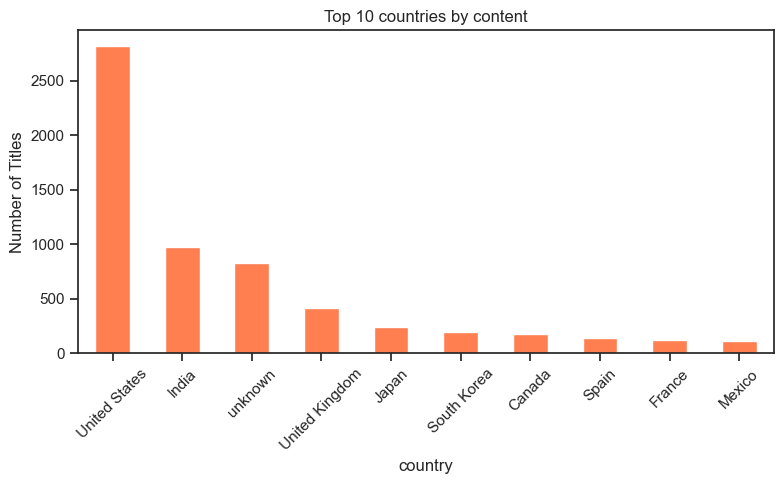

In [316]:
top_countries=df['country'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar',color='coral')
plt.title("Top 10 countries by content")
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Content added over the years

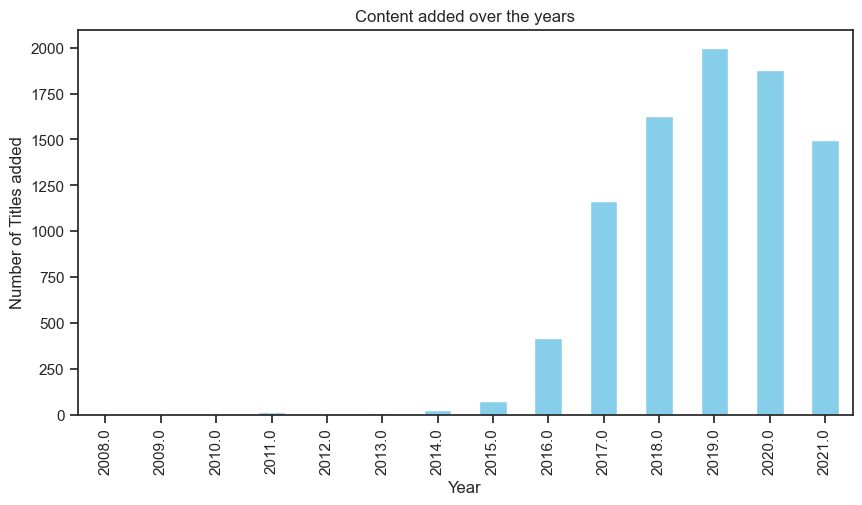

In [306]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.title('Content added over the years')
plt.xlabel('Year')
plt.ylabel('Number of Titles added')
plt.show()

## Top 10 genres

In [308]:
from collections import Counter
genres_list=df['genres'].explode()
top_genres=Counter(genres_list).most_common(10)
genre_names, genre_counts = zip(*top_genres)

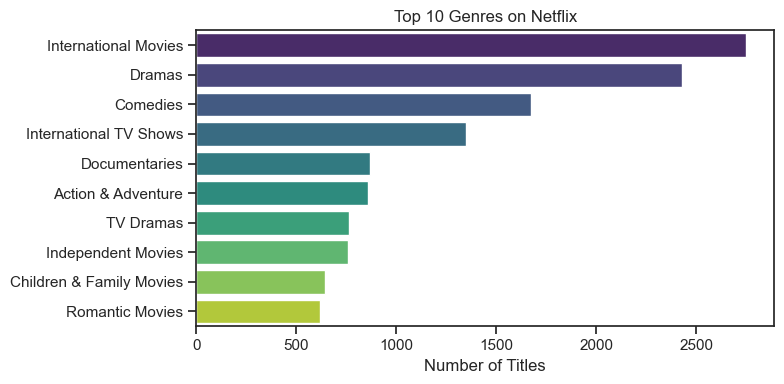

In [310]:
import seaborn as sns
plt.figure(figsize=(8,4))
sns.barplot(x=list(genre_counts),y=list(genre_names),palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

## Most frequent actors

In [353]:
valid_casts=df[df['cast']!='unknown']['cast']
all_actors=valid_casts.str.split(', ').explode()
top_actors=Counter(all_actors).most_common(10)
actor_names, actor_counts=zip(*top_actors)

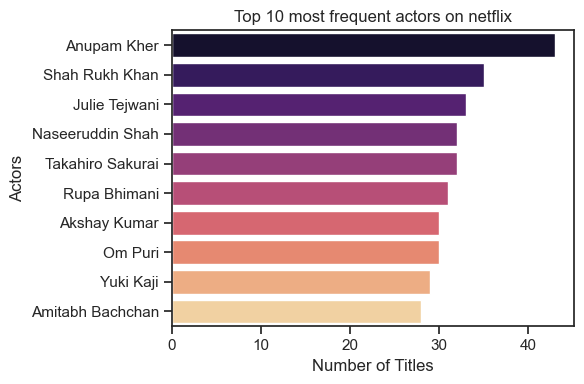

In [364]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(actor_counts),y=list(actor_names),palette='magma')
plt.title("Top 10 most frequent actors on netflix")
plt.ylabel("Actors")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

## Save the clean data

In [368]:
df.to_csv('netflix_cleaned.csv',index=False)
print('sucessfully saved')

sucessfully saved
